###가설 : K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

### 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

###그래프 및 한글 폰트 기본 설정

In [2]:
#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm

####시각화를 위한 폰트 설정

In [3]:
from IPython.display import set_matplotlib_formats
#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 'ggplot' 스타일을 사용
plt.style.use('ggplot')
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [4]:
#그래프에서 마이너스 폰트 깨지는 문제 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

####시스템에 설치된 폰트 확인

In [5]:
sys_font=fm.findSystemFonts()
print("sys_font number : ",len(sys_font))

nanum_font = [f for f in sys_font if "Nanum" in f]
print("nanum_font number : ",len(nanum_font))

print("시스템에 설치된 폰트 경로 : ",sys_font)

sys_font number :  48
nanum_font number :  31
시스템에 설치된 폰트 경로 :  ['/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', 

####폰트 인스톨

In [6]:
#나눔고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq
fm._rebuild()

In [7]:
nanum_font = [f for f in sys_font if "Nanum" in f]
print("nanum_font number : ",len(nanum_font))

nanum_font

nanum_font number :  31


['/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/

###폰트 지정 및 확인

In [8]:
print("현재 설정 폰트",plt.rcParams['font.family'])

#한글폰트경로(나눔바른고딕)
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font_name = fm.FontProperties(fname=fontpath).get_name()
print(font_name)
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

print("현재 설정 폰트",plt.rcParams['font.family'])

현재 설정 폰트 ['sans-serif']
NanumBarunGothic
현재 설정 폰트 ['NanumBarunGothic']


###데이터 로드하기

In [9]:
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210520105342.csv', encoding='cp949')

In [10]:
#국가(대륙)별 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

중국            45
합계            45
대양주           45
유럽연합(EU)      45
미국            45
기타            45
중동            45
일본            45
아세안(ASEAN)    45
중남미           45
Name: 국가(대륙)별, dtype: int64

In [11]:
#미국 데이터만 보기
df_raw[df_raw['국가(대륙)별'] == '미국']

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,37009,31793,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,1054,946,791,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,3286,3571,2921,2744,3354,2730,2425,2575,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,18,23,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,2712,2402,2546,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,116,147,103,82,83,67,45,37,125,175,251,172,269,88,156,118,338


###분석과 시각화를 위한 tidy data 만들기

In [12]:
df_raw.head(3)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,450568,511395,494391,560853,726741,768504,574551,749612,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628
1,합계,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,610257,441096,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,158247,133455,138982,180356,168059,171886,159750,203404,180429,188565,189763,225993


In [13]:
df = df_raw.melt(id_vars=['국가(대륙)별','상품군별','판매유형별'],var_name='기간',value_name='백만원')
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


###데이터 전처리

####기간에서 연도,분기를 분리하기

In [15]:
#map함수 매개변수는 func(함수)를 받기 때문에 람다를 지정
#람다 : x값은 매개변수로 받아오고 : 매개변수에 함수를 사용
df['연도'] = df['기간'].map(lambda x : int(x.split()[0]))
df['분기'] = df['기간'].map(lambda x : int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


####금액을 수치데이터로 표현하기 위해 데이터 타입 변경

In [16]:
# - 문자를 결측치로 변경하고  float 타입으로 변경
df['백만원']= df['백만원'].replace('-',np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


####필요없는 데이터 제거

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [18]:
#합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [19]:
#결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

### K-Beauty 시각화

####전체 상품군 판매액

In [23]:
#판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
#판매유형별 == "계" 데이터만 가져와서 봐야함
#평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있다.

df_total = df[df['판매유형별'] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


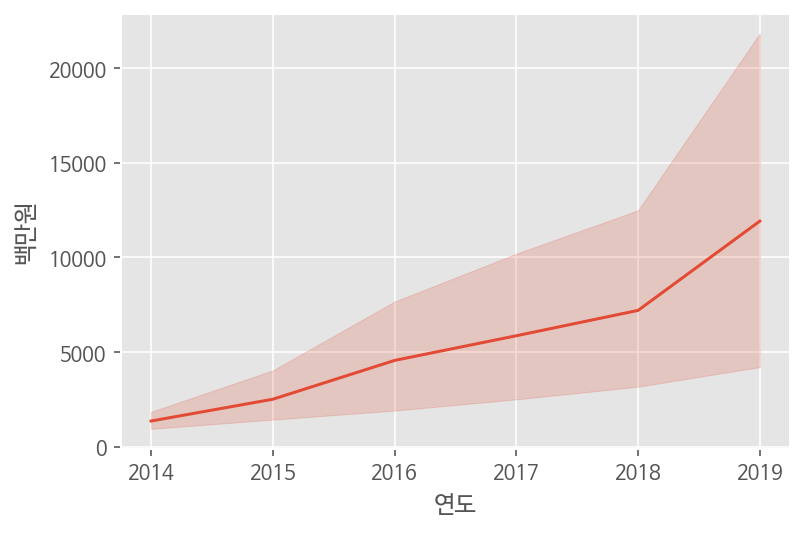

In [24]:
#연도, 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x='연도', y='백만원')
#연도가 증가할수록 판매액이 증가하고 있다는 것을 알수 있음

- legend를 그래프의 밖에 그리기

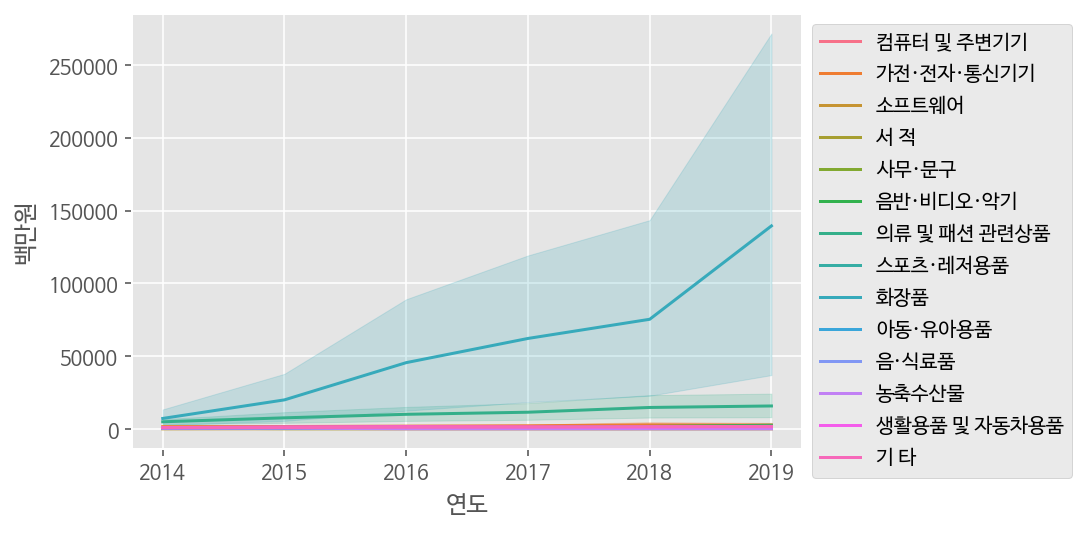

In [33]:
#연도, 판매액, lineplot으로 그림
#상품군별로 다른 색상을 표현

sns.lineplot(data=df_total, x='연도',y='백만원',hue='상품군별')
#legend 밖으로 그리기
plt.legend(loc='best', bbox_to_anchor=(1,1))

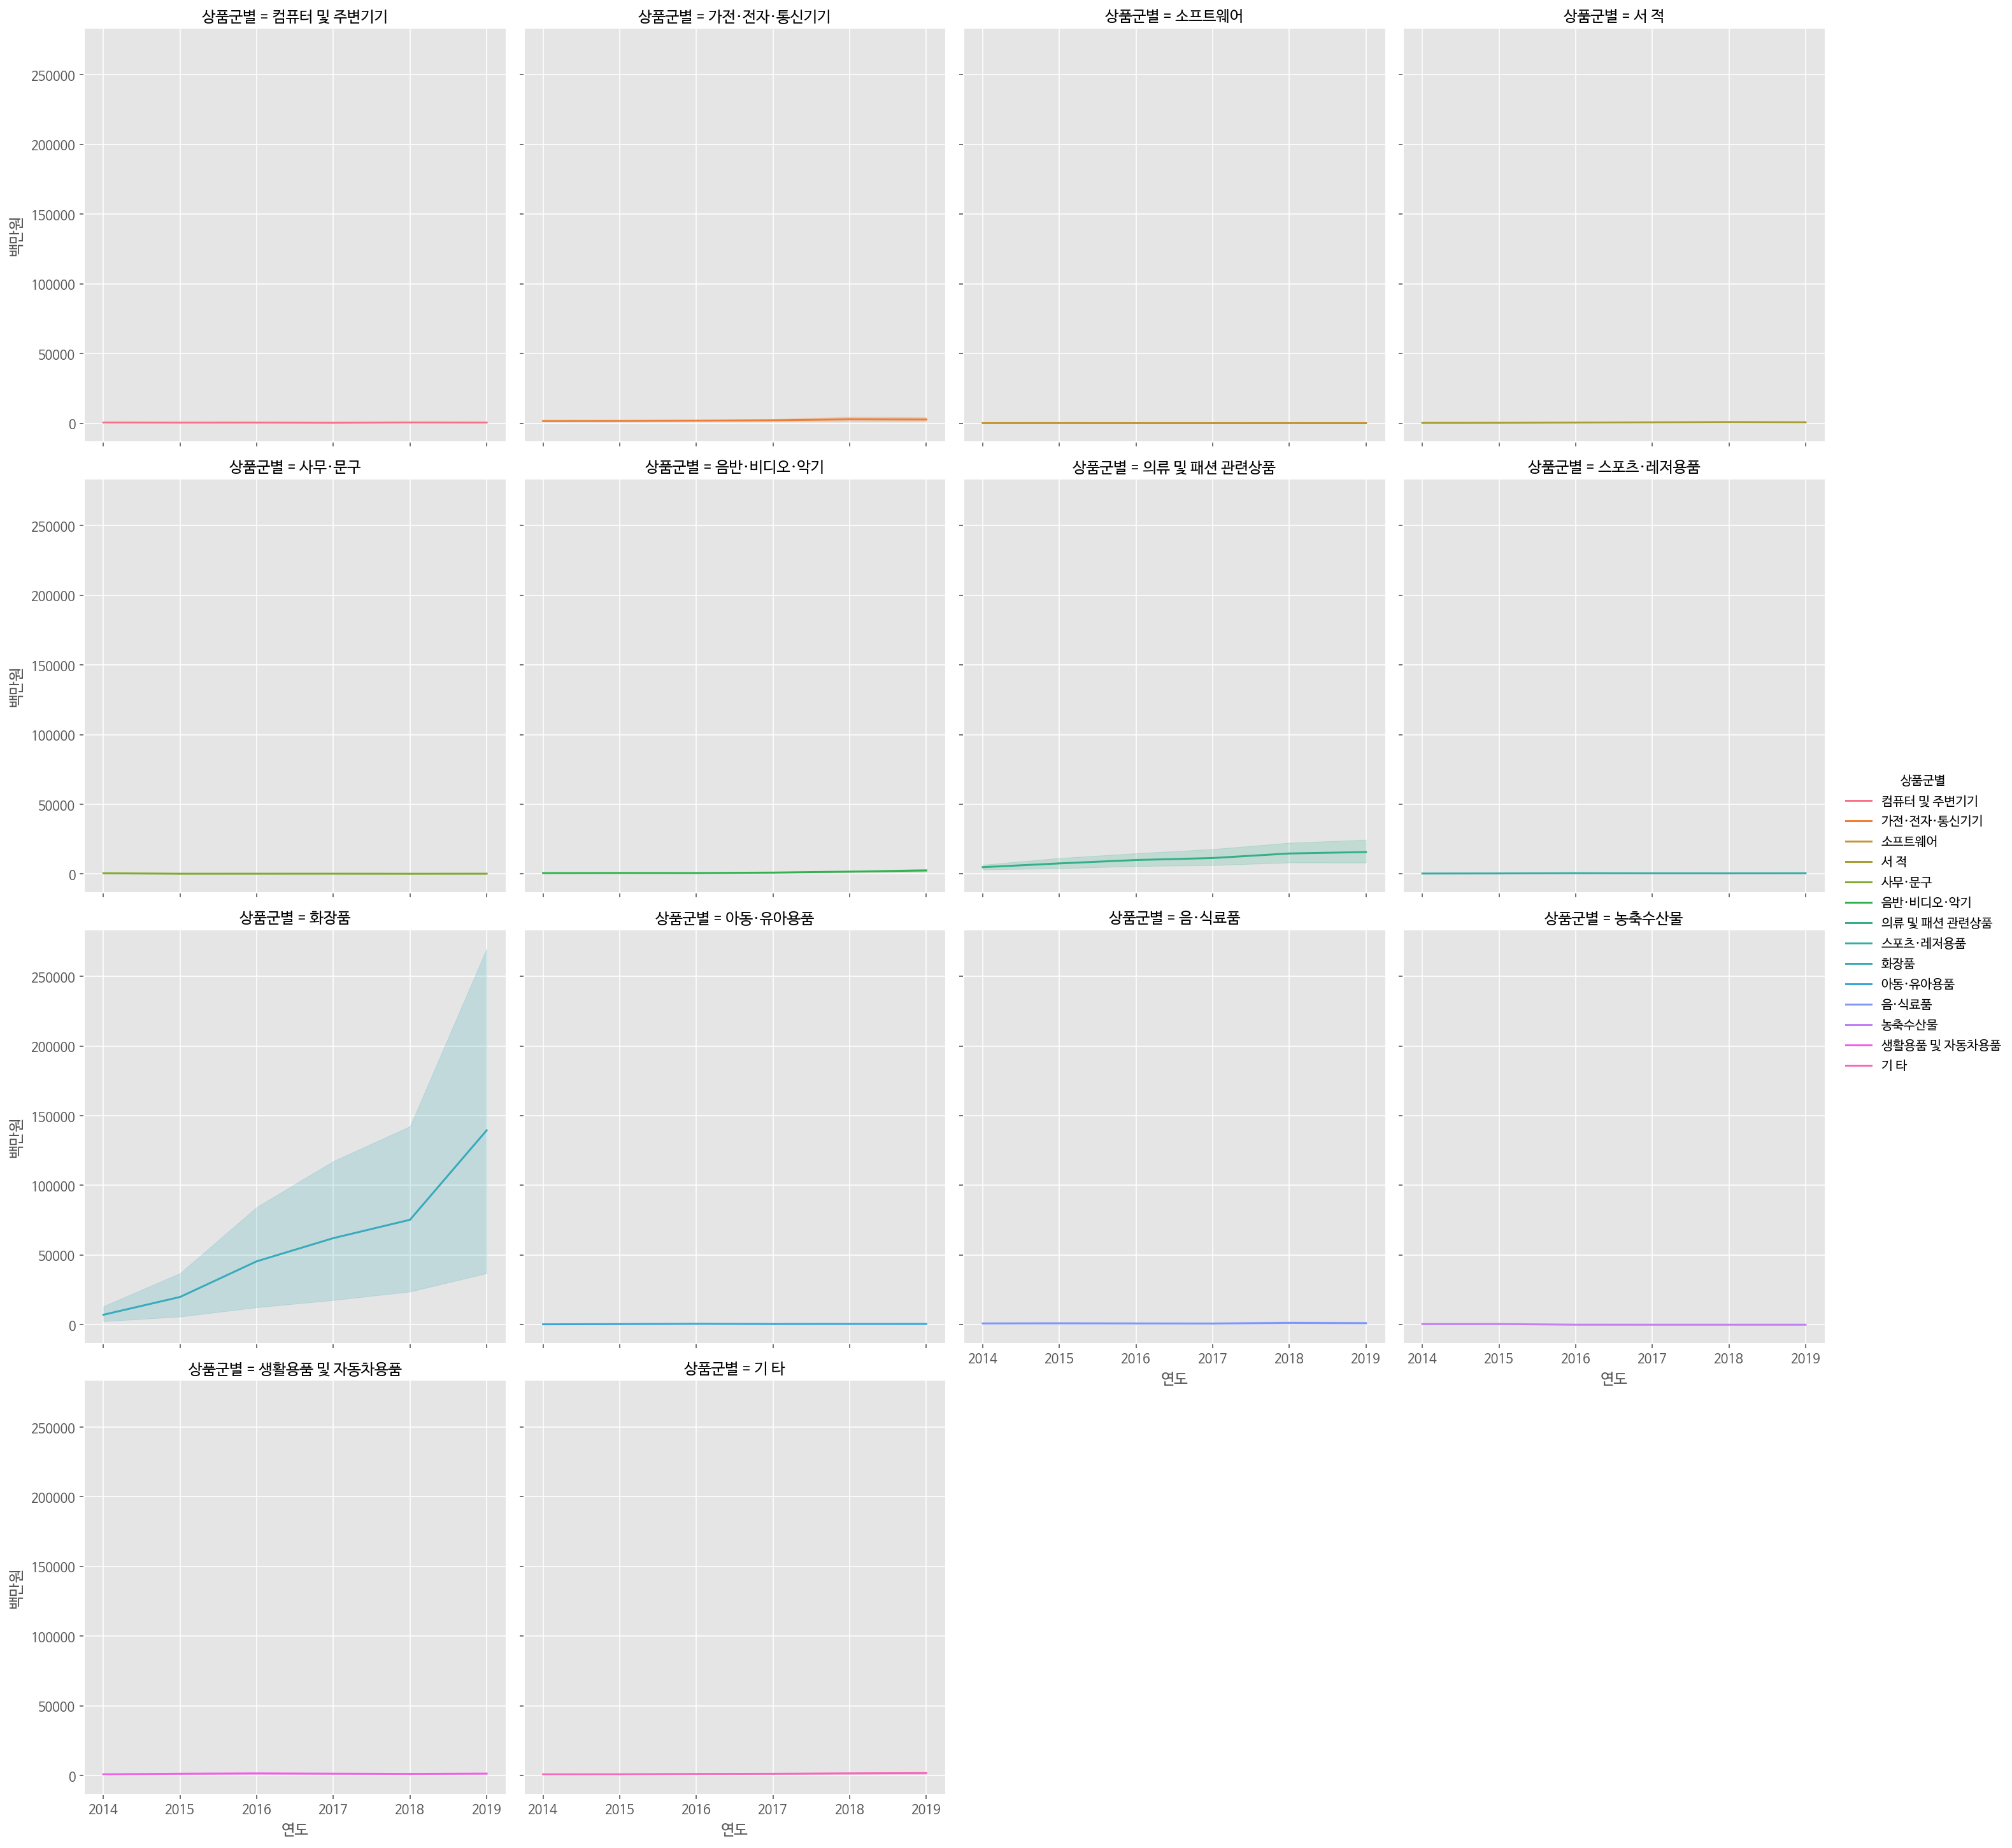

In [38]:
#위에 그린 그래프를 자세히 보기위해 서브플롯으로 표현
sns.relplot(kind='line', data=df_total, x='연도',y='백만원',hue='상품군별',col='상품군별',col_wrap=4)

In [55]:
#isin을 사용해 화장품만 제외하고 df_sub이라는 변수에 담기
#df_total['상품군별'] == '화장품' , df_total['상품군별'].isin(['화장품']) 두코드는 같은 의미
#화장품 값만 제외하고 가져옴
df_sub = df_total[~df_total['상품군별'].isin(['화장품','의류 및 패션 관련상품'])].copy()
df_sub.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


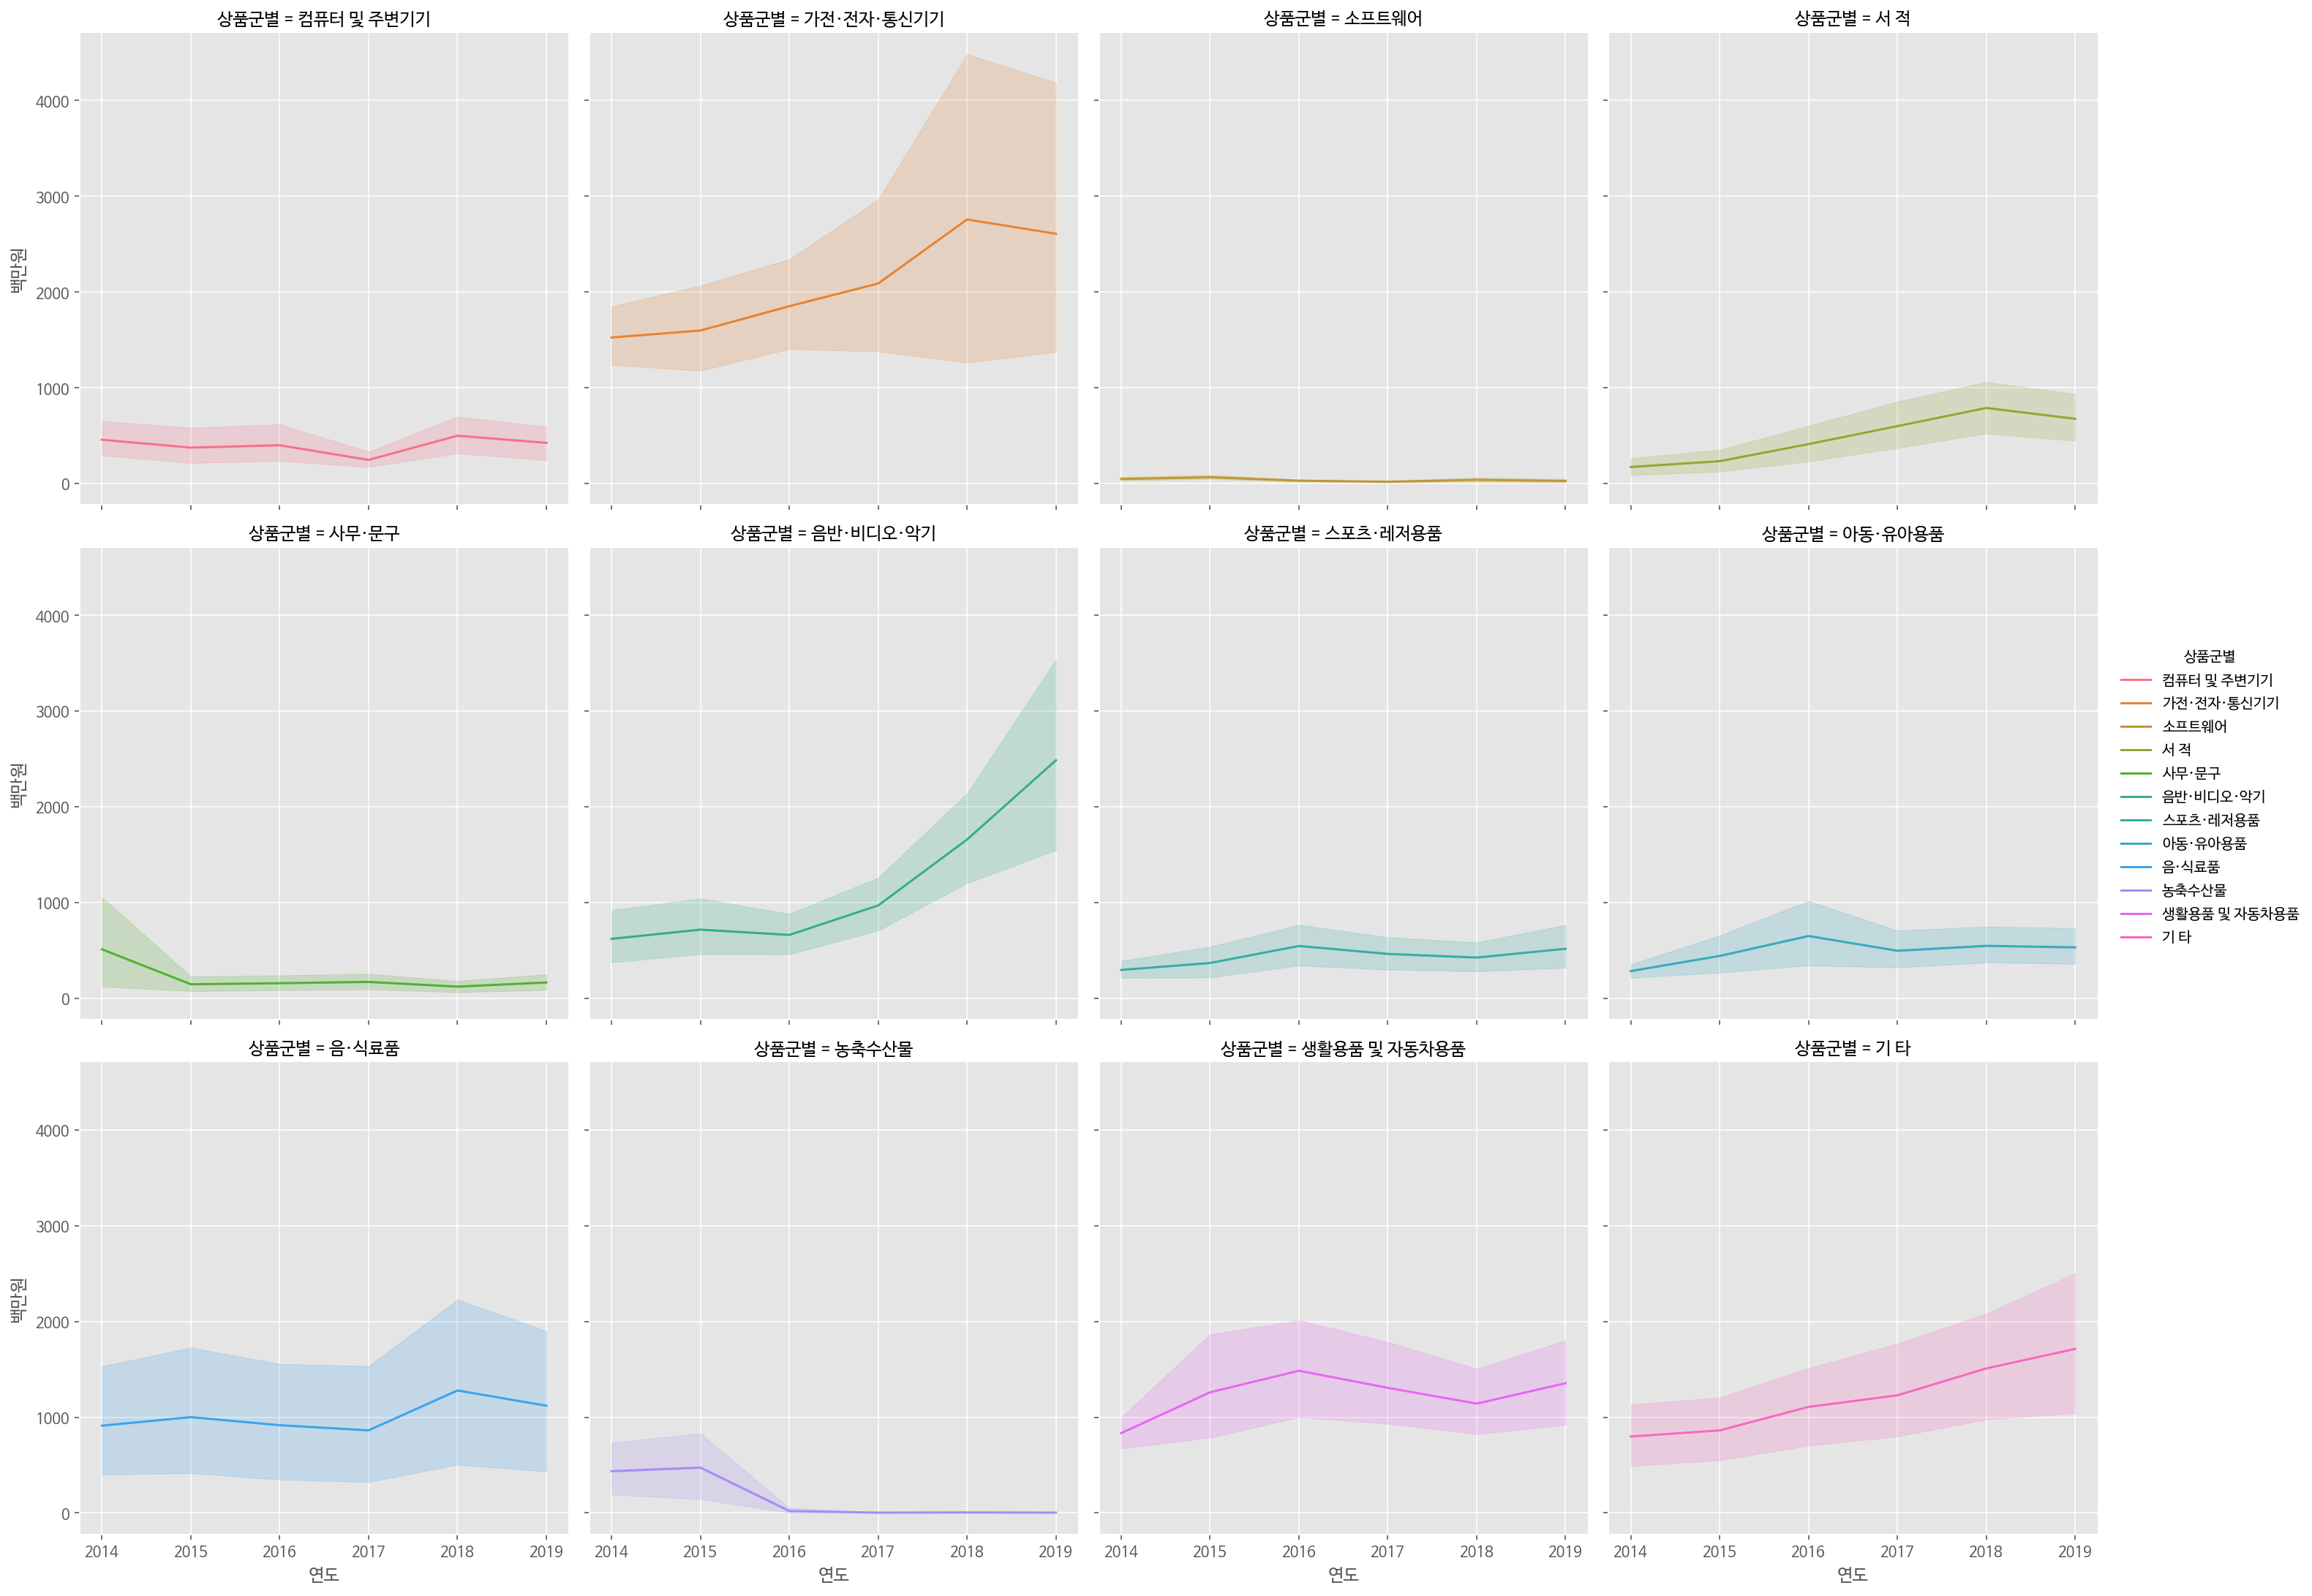

In [56]:
#연도별 판매액을 상품군별로 relplot을 활용해 서브플롯을 그리기
sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별', col='상품군별', kind='line', col_wrap=4)

####화장품의 온라인쇼핑 해외직접판매액

In [62]:
#df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

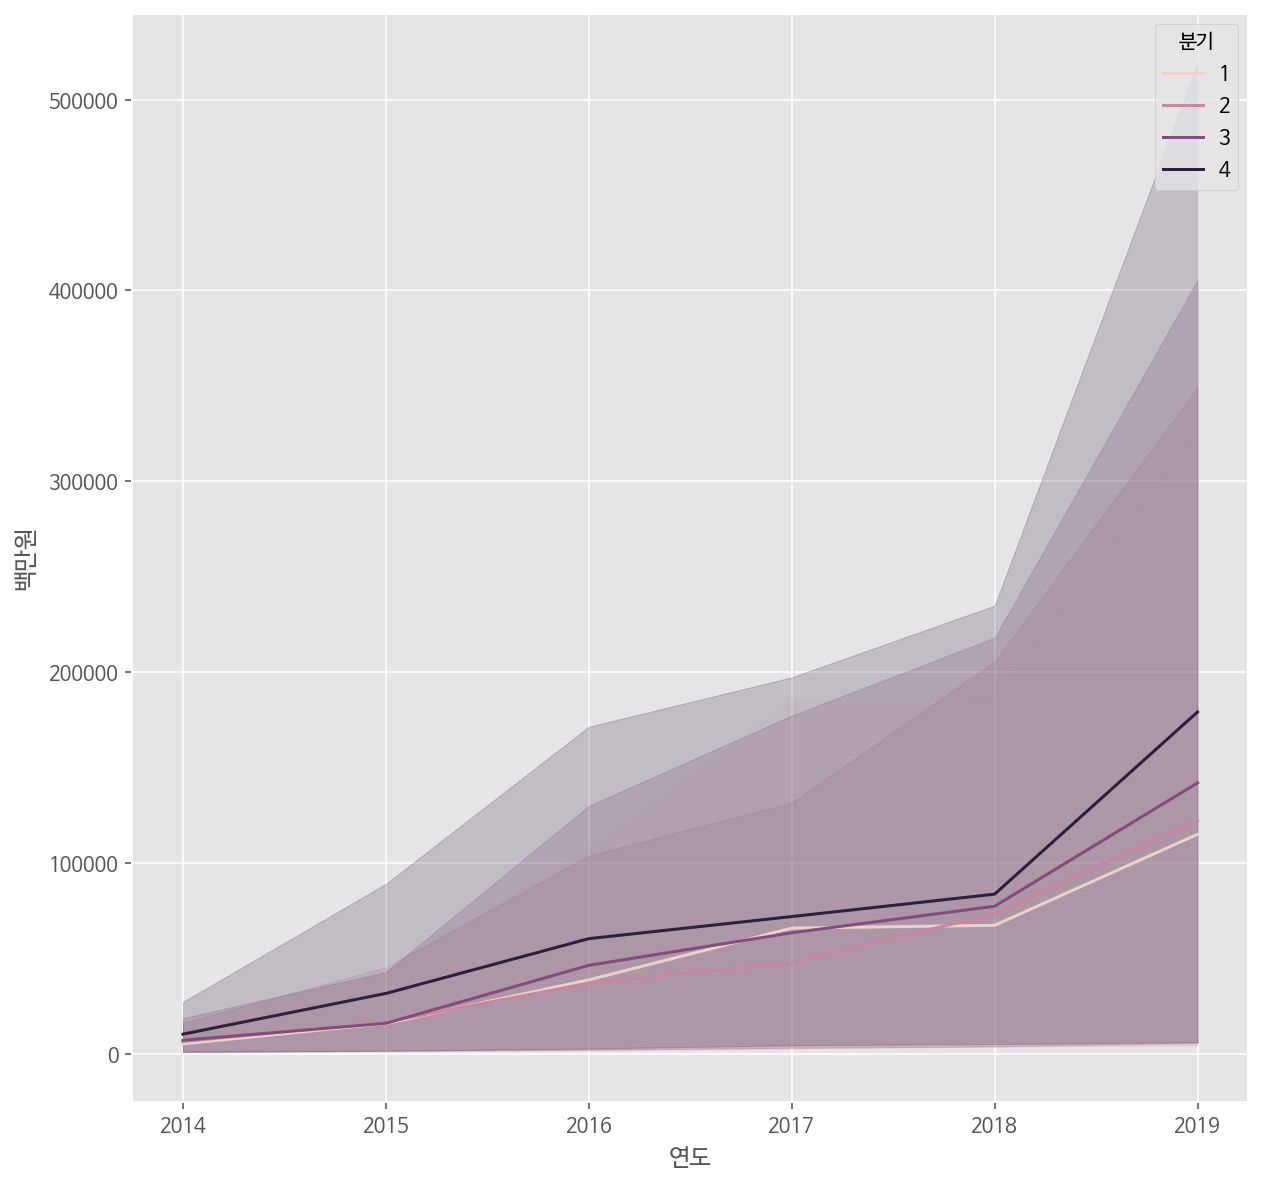

In [64]:
#연도와 판매액을 lineplot으로 그리고 분기별로 다른색상으로 표현
plt.figure(figsize=(10,10))
sns.lineplot(data=df_cosmetic, x='연도', y='백만원', hue='분기')

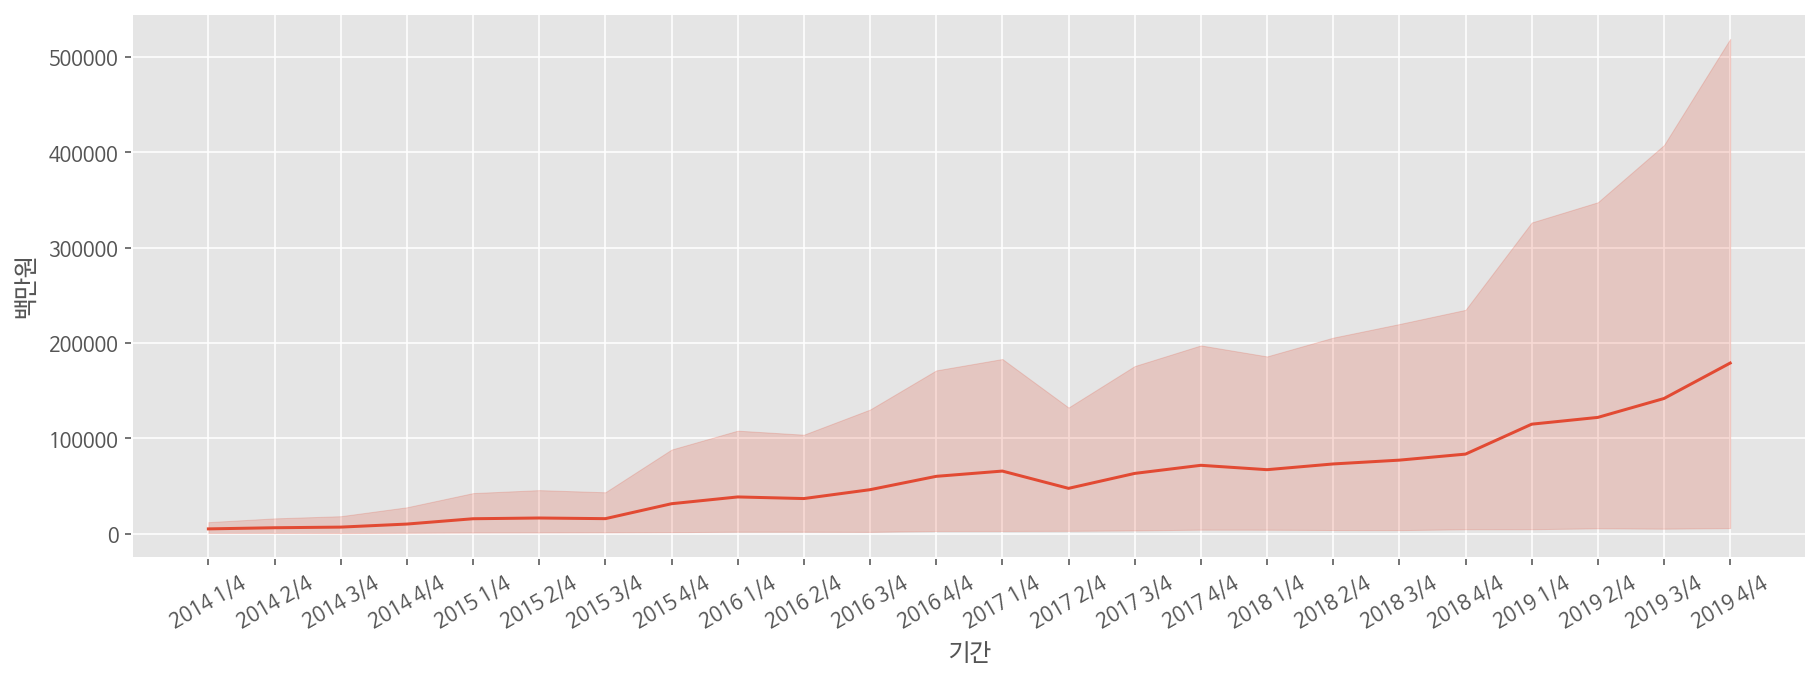

In [67]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화 
plt.figure(figsize=(15,5))
plt.xticks(rotation= 30)
sns.lineplot(data=df_cosmetic, x='기간',y='백만원')

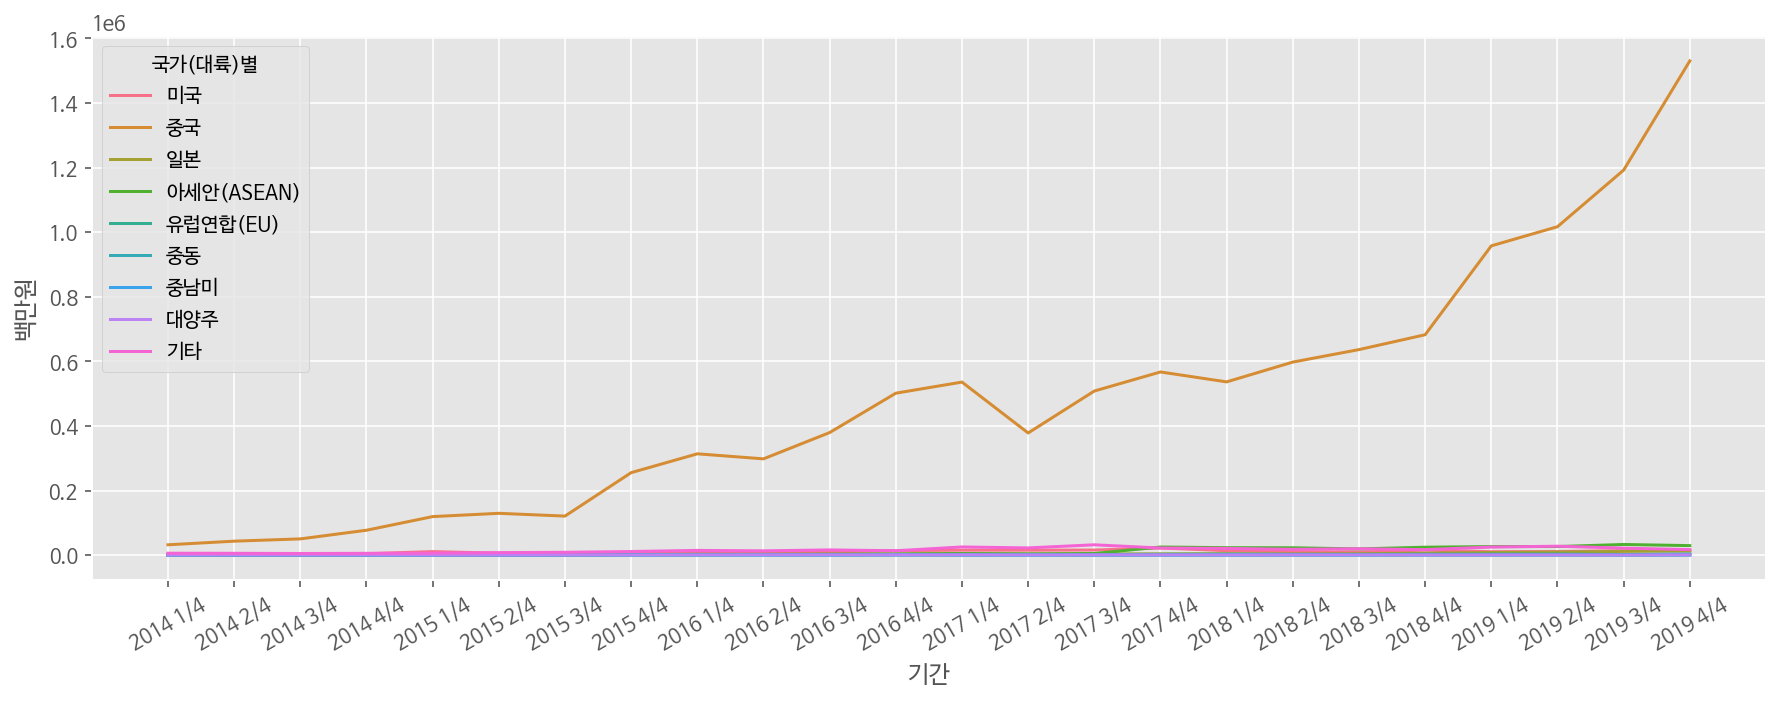

In [68]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화
#국가(대륙)별로 다른색상으로 표현
plt.figure(figsize=(15,5))
plt.xticks(rotation= 30)
sns.lineplot(data=df_cosmetic, x='기간',y='백만원', hue='국가(대륙)별')

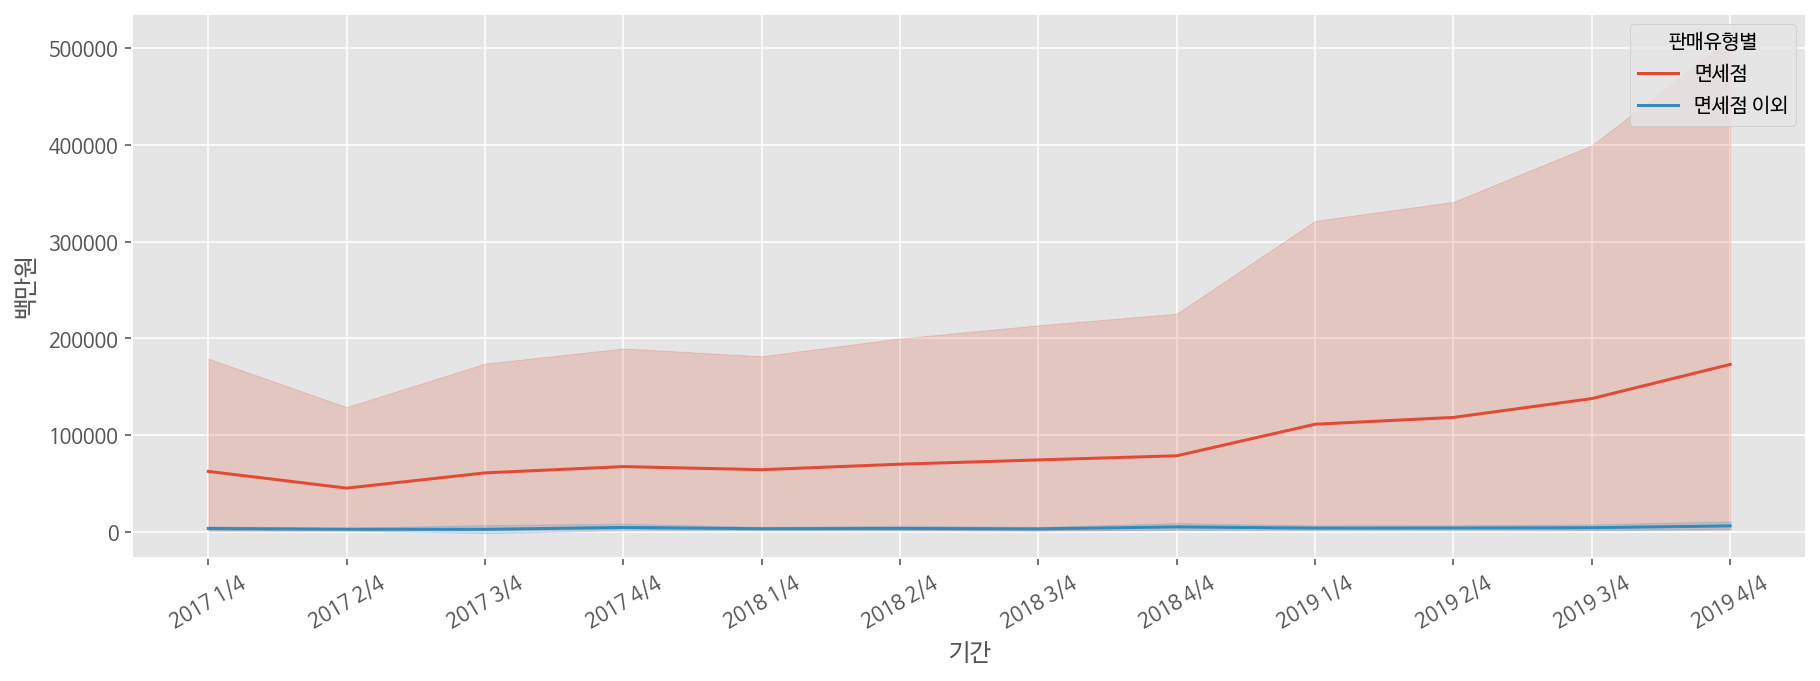

In [78]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화
#판매유형별로 다른 색상 표현

df_sub = df[(df['판매유형별'] != "계") & (df['상품군별'] == "화장품")].copy()
plt.figure(figsize=(15,5))
plt.xticks(rotation= 30)
sns.lineplot(data=df_sub, x='기간',y='백만원', hue='판매유형별')

####의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [93]:
#df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] == "계") ].copy()
print(df_fashion['판매유형별'].unique())
print(df_fashion['상품군별'].unique())
df_fashion.head()

['계']
['의류 및 패션 관련상품']


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


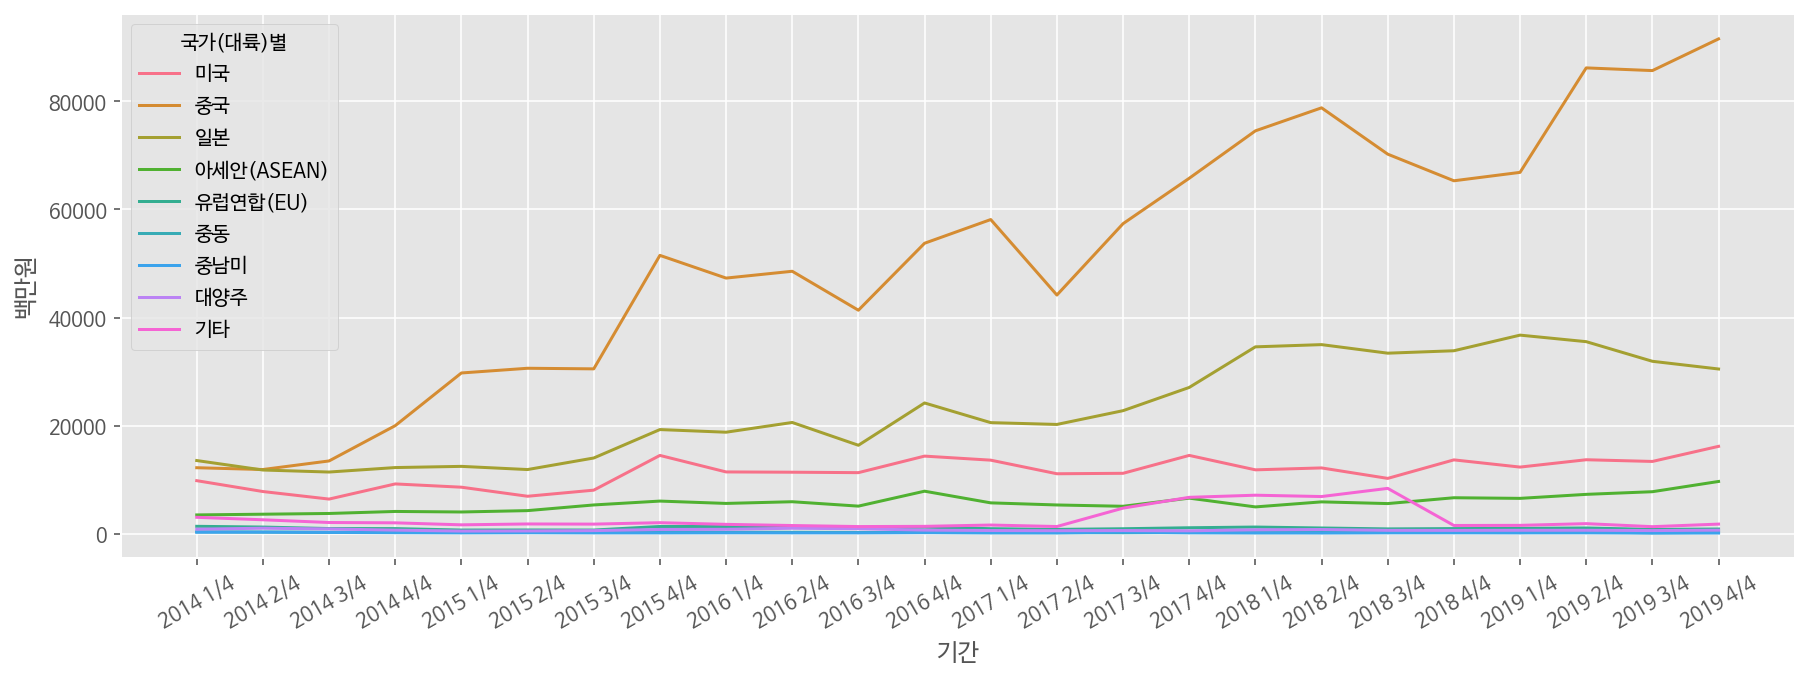

In [94]:
#의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터 시각화
#국가(대륙)별로 다른색상 표현
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='백만원',hue='국가(대륙)별')

['면세점' '면세점 이외']
['의류 및 패션 관련상품']


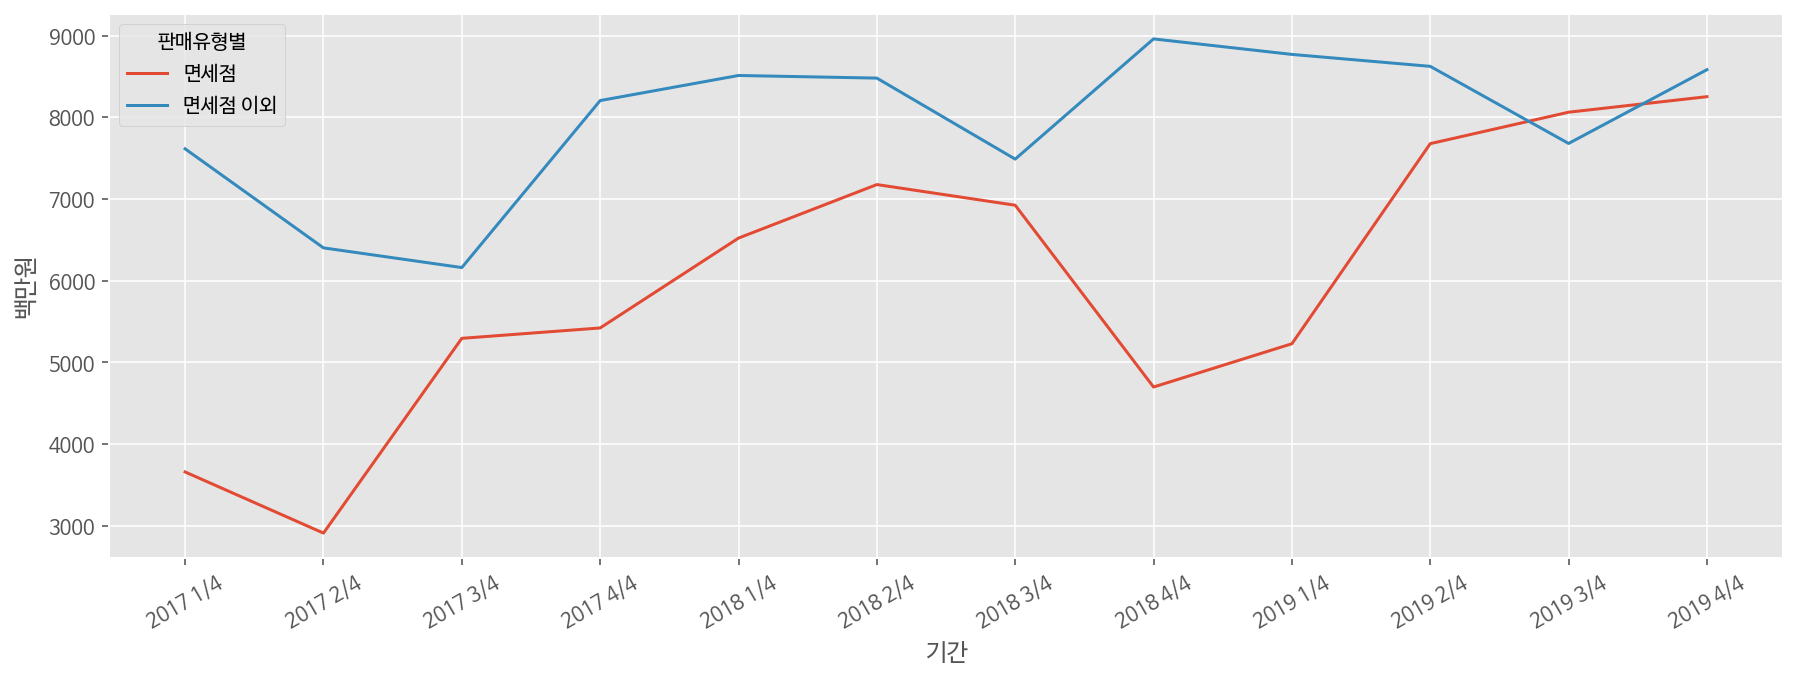

In [95]:
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] != "계") ].copy()
print(df_fashion['판매유형별'].unique())
print(df_fashion['상품군별'].unique())
df_fashion.head()

#의류 및 패션 관련상품 판매액에 대한 기간별 데이터 시각화
#판매유형별로 다른 색상 표현
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='백만원',hue='판매유형별',ci=None)

####데이터 집계하기

In [123]:
#피벗테이블로 국가(대륙)별, "연도"별 함께 금액을 표형태로 구하기
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') ].copy()
result = df_fashion.pivot_table(index='국가(대륙)별',columns='연도', values='백만원',aggfunc='sum')
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,28774.0,47802.0,12950.0
대양주,3392.0,2349.0,3401.0,4532.0,5450.0,4978.0
미국,33223.0,38066.0,48451.0,100706.0,95750.0,111072.0
아세안(ASEAN),14936.0,19639.0,24478.0,45342.0,46136.0,62494.0
유럽연합(EU),4485.0,3374.0,4899.0,7472.0,8228.0,7388.0
일본,48960.0,57594.0,79905.0,181168.0,273600.0,269274.0
중국,57531.0,142339.0,190932.0,450814.0,577696.0,660534.0
중남미,975.0,616.0,649.0,1524.0,1152.0,1088.0
중동,1172.0,1018.0,968.0,1544.0,1758.0,1902.0


####연산 결과를 시각적으로 보기

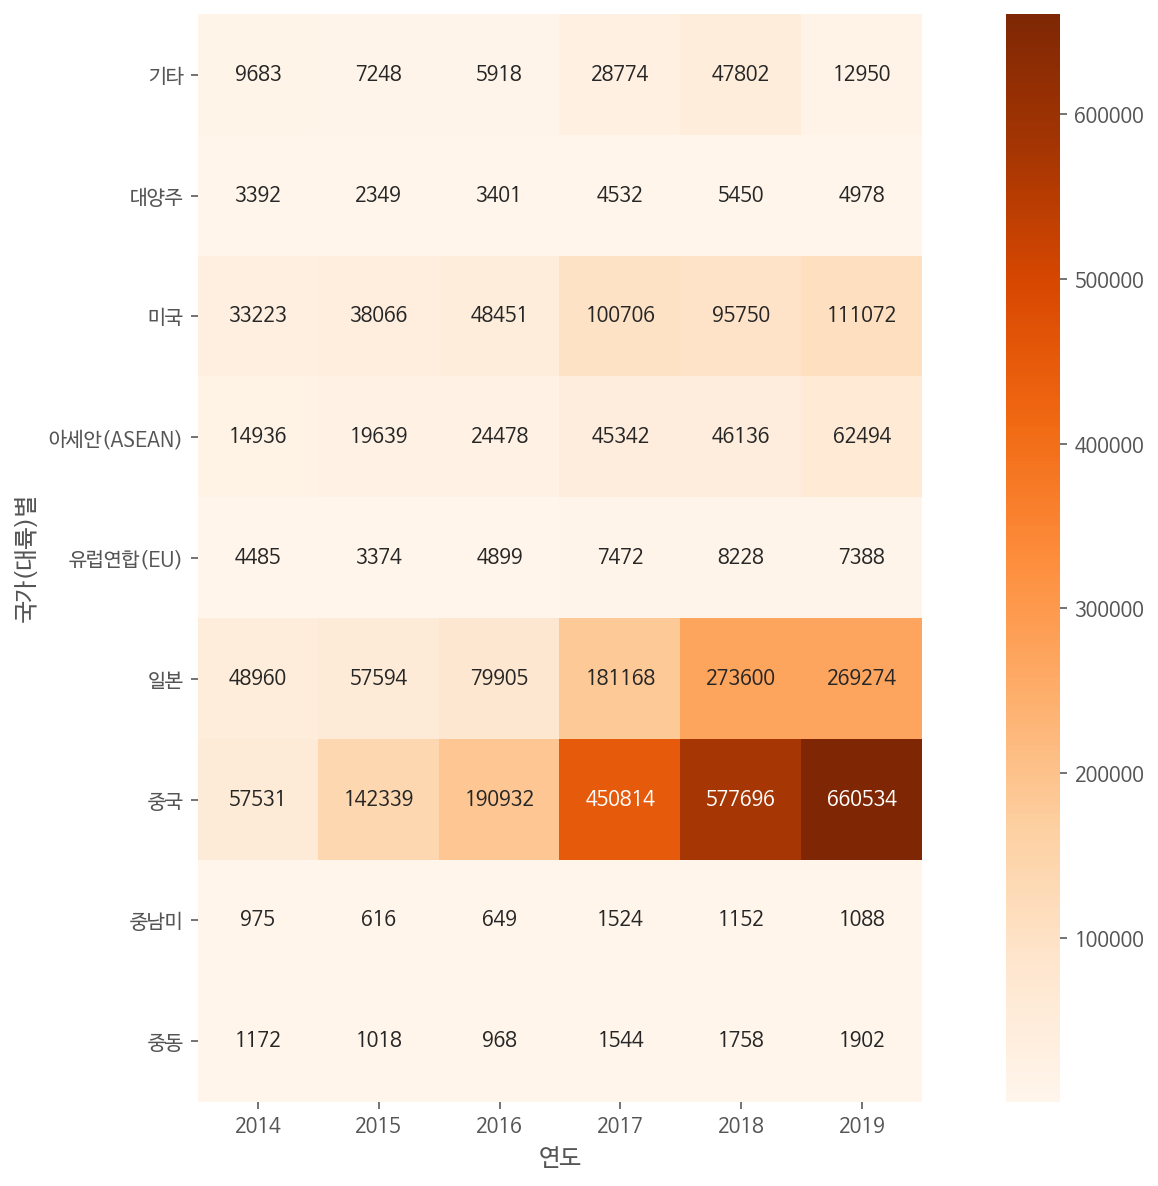

In [124]:
#피벗테이블로 구한 결과를 값이 많고 적음에 따라 시각적으로 표현
#피벗테이블을 sns.heatmap 으로 표현하면 얼마나 증가했는지 시각적으로 보기 쉽다.
plt.figure(figsize=(15,10))
sns.heatmap(result,cmap='Oranges',annot=True,fmt='.0f',square=True)

####전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

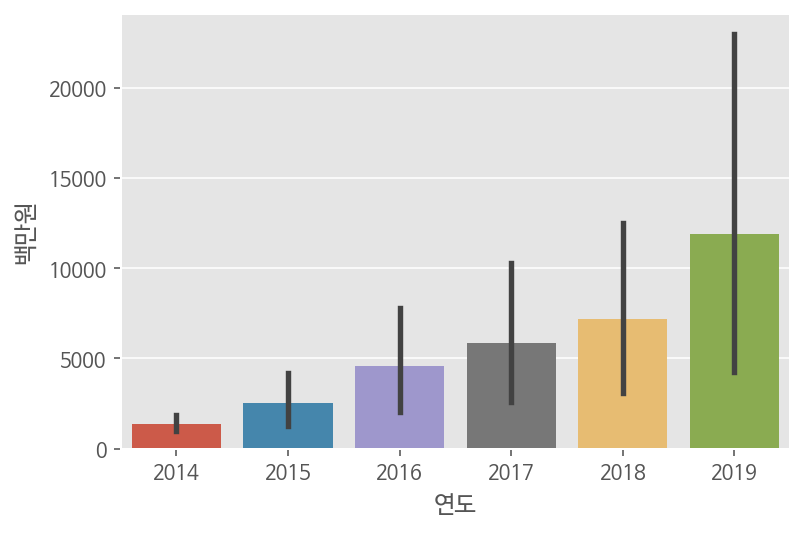

In [127]:
#위에서 판매유형별 데이터의 '계'만 모은 df_total변수를 통한 연도별 합계 금액을 시각화
sns.barplot(data=df_total, x='연도',y='백만원')

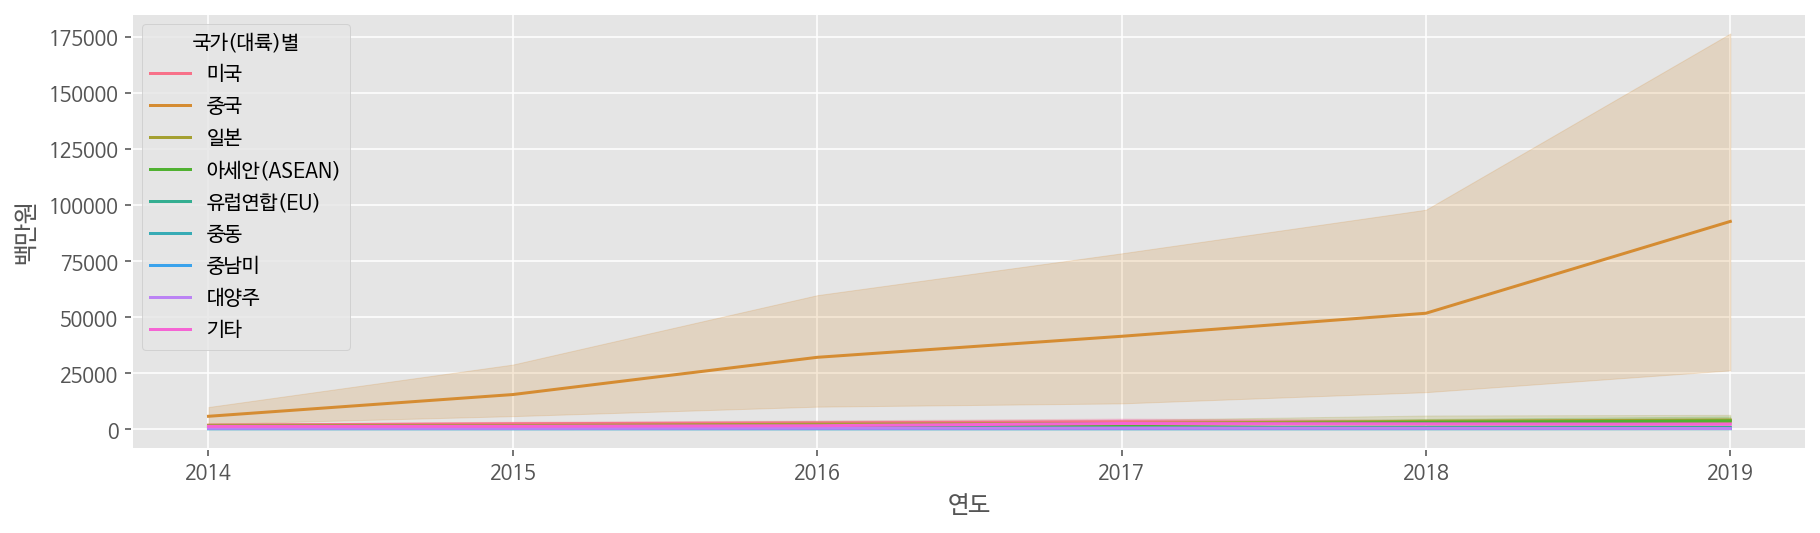

In [130]:
#연도별 판매액을 그리고 국가(대륙)별로 다른색상 표현
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x='연도',y='백만원',hue='국가(대륙)별')

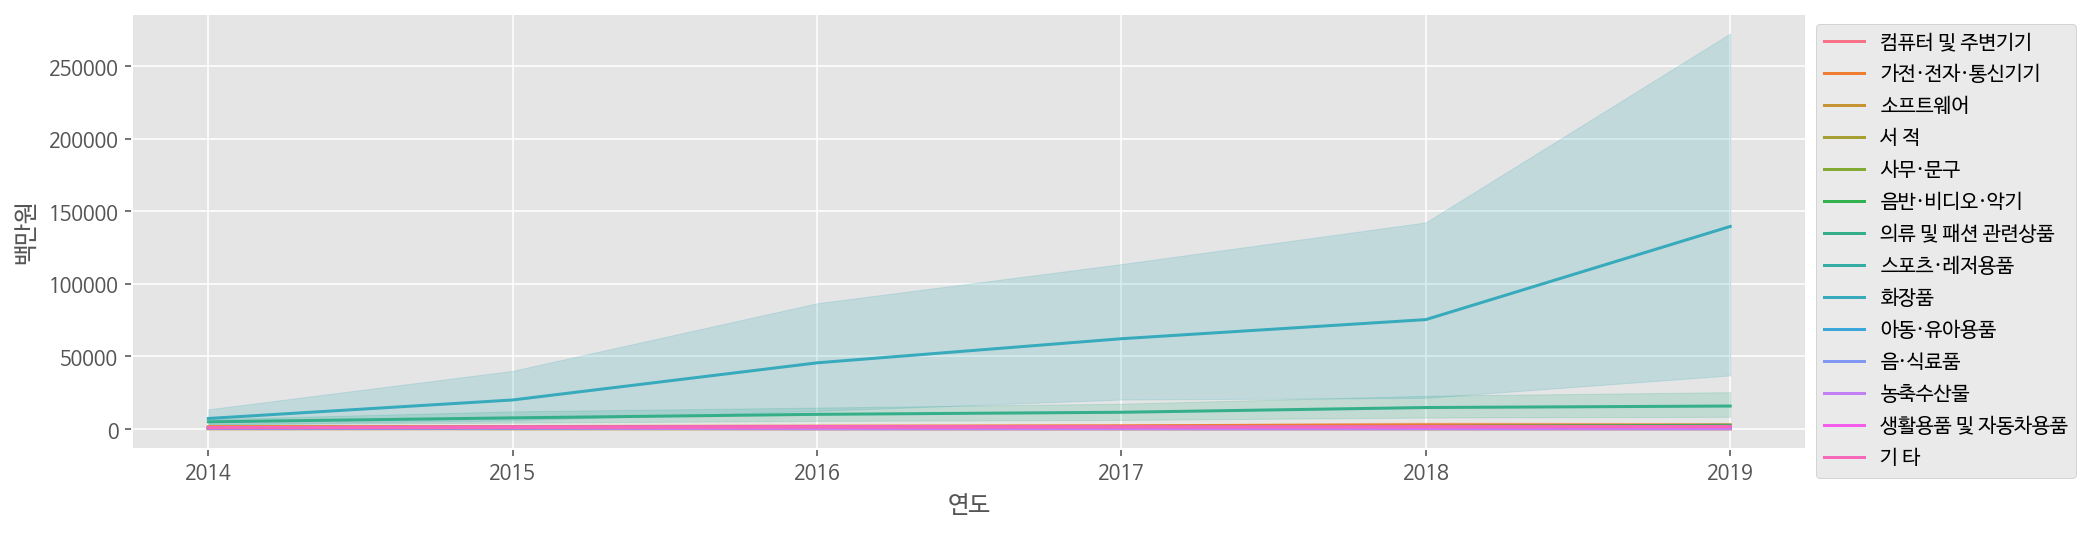

In [137]:
#연도별 판매액을 그리고 상품군별로 다른색상 표현
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x='연도',y='백만원',hue='상품군별')
plt.legend(loc='best', bbox_to_anchor=(1,1))